In [2]:
%load_ext line_profiler
%load_ext autoreload
%autoreload 2

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import numpy as np
import old.tools, old.RNTK_avg
import jax
import symjax
import symjax.tensor as T
import copy
import time
import json
import matplotlib.pyplot as plt

from RNTK_onediag_dual import RNTK
from RNTK_onediag_dual import create_func as create_func_dual

In [26]:
import re

In [85]:
new_dict = {}
with open("timings.txt", "r") as file:
    mlines = file.readlines()
lineitems = mlines[1:-1:2]
listofres = [{"ti":int((res := re.search("\"(?P<ti>[0-9]*),(?P<tip>[0-9]*)\": (?P<z>[0-1])\\n", i)).group("ti")), "tip": int(res.group("tip")), "z": int(res.group("z"))} for i in lineitems]

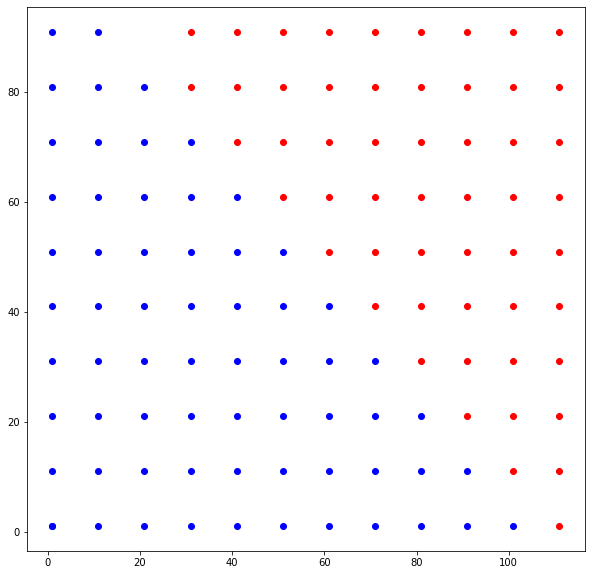

In [93]:
fig, ax = plt.subplots(figsize = (10, 10))
for res in listofres:
    # print(res)
    ax.plot(res["ti"], res["tip"], ('bo', 'ro')[bool(res["z"])])

In [4]:
# get old vt for the first algorithm

In [5]:
dic = {}
dic["n_patrons1="] = 10#00 #// N (what affect symjax time)
dic["n_entradasTiP="] = 2#00 #// TiPrime length
dic["n_entradasTi="] = 5#00 #// Ti length (multiplier on symjax time)
N = int(dic["n_patrons1="])
ti_length = int(dic["n_entradasTi="])
DATA = T.Placeholder((N, ti_length), 'float32', name = "X")
DATAT = T.transpose(DATA)
#testing
DATA_NP = np.zeros((N, ti_length))
DATA_NP_T = np.transpose(DATA_NP)


In [6]:
rntk = RNTK(None, None, None, True)

In [30]:
q = compute_q(DATA)
q_prime = compute_q(DATA)